# FLIGHT RISK ANALYSIS

## INTRODUCTION :
#### use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

### DATA INFORMATION AND COLUMNS

### BUSINESS PROBLEM :
#### Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

##### DATA SOURCE : The dataset is obtained from kaggle . https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

##### Loading the data 

In [2]:
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
df.head()

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\2286730898.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# viewing first 5 rows of the data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# taking a sample of the data
df.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
51671,20011105X02192,Accident,LAX02LA016,2001-10-24,"LAUGHLIN, NV",United States,35.157222,-114.256111,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,6.0,VMC,Standing,Probable Cause,30-12-2003
87581,20220328104831,Accident,ERA22LA169,2022-03-25,"Smithfield, NC",United States,353135N,0078232W,JNX,Johnston Regional Airport,...,Instructional,BLUE LINE AVIATION LLC,0.0,0.0,2.0,0.0,VMC,NaN,NaN,15-04-2022
4395,20001214X42775,Accident,MKC83FA090,1983-04-15,"KECHI, KS",United States,NaN,NaN,NaN,NaN,...,Unknown,NaN,1.0,0.0,0.0,0.0,UNK,Takeoff,Probable Cause,NaN
57850,20041221X02017,Accident,ATL05CA027,2004-11-19,"HUNTSVILLE, AL",United States,34.640277,-86.773056,KHSV,Huntsville International,...,Personal,NaN,NaN,1.0,NaN,3.0,IMC,Approach,Probable Cause,28-06-2006
58037,20050111X00035,Accident,ATL05FA041,2005-01-07,"Bradley, SC",United States,34.059444,-82.2425,KGRD,Greenwood County,...,Personal,NaN,4.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,26-02-2007
52188,20020311X00327,Accident,SEA02LA045,2002-02-27,"ELMA, WA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,Approach,Probable Cause,28-05-2002
34539,20001206X00773,Accident,LAX94LA128,1994-02-19,"REDLANDS, CA",United States,NaN,NaN,L12,REDLANDS MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,01-06-1995
27609,20001212X16688,Accident,NYC91LA092,1991-03-23,"WESTBROOK, ME",United States,NaN,NaN,PWM,PORTLAND,...,Personal,NaN,0.0,0.0,0.0,4.0,IMC,Cruise,Probable Cause,05-05-1993
76021,20141116X75006,Incident,CEN15IA046,2014-11-11,"Viosca Knoll 989,",United States,285823N,0883734W,NaN,NaN,...,NaN,ROTORCRAFT LEASING CO LLC,0.0,0.0,0.0,4.0,VMC,NaN,Engine power surges during takeoff for reasons...,25-09-2020
62207,20100113X04347,Accident,ERA10CA112,2007-03-19,"CALHOUN CITY, MS",United States,33.770278,-89.238889,MS76,Wade Field Airport,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,Takeoff,Probable Cause,16-06-2010


### Understanding the Dataset Structure

In [5]:
# checking size and Dimensionality of the data
df.shape

(88889, 31)

In [6]:
# checking for column names in our data
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
# Investigating the data type of our column names 
""" Helps counter-check each column name and the appropriate datat type associated with it
"""
df.dtypes 

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [8]:
# converting to date time
df['Event.Date'] = pd.to_datetime(df['Event.Date'] , errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\835225227.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')


In [9]:
df.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

In [10]:
# general information of the data 
""" It helps us inspect chararistics of the data per column, such as column name , type and availability of null values 
Also informs about the total memory usage 
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [11]:
df.columns.tolist()

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [12]:
# looking for Duplicates
df.duplicated().sum()

0

#### Summary Statistics 

In [13]:
# Summary Statistics 
""" Getting the concise summary of the data 
To help us look for possible outliers 
"""
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Publication.Date
count,88889,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000,75118
mean,1999-09-17 17:13:39.354475904,1.146585,0.647855,0.279881,0.357061,5.325440,2004-09-07 19:19:40.766260992
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1980-04-16 00:00:00
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1993-09-28 00:00:00
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,2002-02-20 00:00:00
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2020-09-25 00:00:00
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000,2022-12-30 00:00:00
std,NaN,0.446510,5.485960,1.544084,2.235625,27.913634,NaN


##### Missing Values or Null values 

In [14]:
# cross checking missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [15]:
# percentage values of missing values
""" Converts the missing values in percentage format
"""

df.isnull().sum()/ len(df)*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

## Data Preparation And Data Cleaning

##### Standardizing the column names 

In [16]:
df.columns = df.columns.str.replace('.', '_')
""" Standardizing the column names where it replaces the (.) with (_)
"""

' Standardizing the column names where it replaces the (.) with (_)\n'

In [17]:
df.columns.tolist()

['Event_Id',
 'Investigation_Type',
 'Accident_Number',
 'Event_Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport_Code',
 'Airport_Name',
 'Injury_Severity',
 'Aircraft_damage',
 'Aircraft_Category',
 'Registration_Number',
 'Make',
 'Model',
 'Amateur_Built',
 'Number_of_Engines',
 'Engine_Type',
 'FAR_Description',
 'Schedule',
 'Purpose_of_flight',
 'Air_carrier',
 'Total_Fatal_Injuries',
 'Total_Serious_Injuries',
 'Total_Minor_Injuries',
 'Total_Uninjured',
 'Weather_Condition',
 'Broad_phase_of_flight',
 'Report_Status',
 'Publication_Date']

##### Selecting the relevant column names for Aircraft Risk A nalysis

In [18]:
relevant_columns = [
 'Event_Date', 'Make', 'Model', 'Injury_Severity', 'Total_Fatal_Injuries',
 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
  'Purpose_of_flight', 'Aircraft_Category', 'Engine_Type',
 'Number_of_Engines','Location', 'Broad_phase_of_flight', 'Country']

In [19]:
relevant_columns

['Event_Date',
 'Make',
 'Model',
 'Injury_Severity',
 'Total_Fatal_Injuries',
 'Total_Serious_Injuries',
 'Total_Minor_Injuries',
 'Total_Uninjured',
 'Purpose_of_flight',
 'Aircraft_Category',
 'Engine_Type',
 'Number_of_Engines',
 'Location',
 'Broad_phase_of_flight',
 'Country']

In [20]:
df = df[relevant_columns]
df

,Event_Date,Make,Model,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Purpose_of_flight,Aircraft_Category,Engine_Type,Number_of_Engines,Location,Broad_phase_of_flight,Country
0,1948-10-24,Stinson,108-3,Fatal(2),2.0,0.0,0.0,0.0,Personal,NaN,Reciprocating,1.0,"MOOSE CREEK, ID",Cruise,United States
1,1962-07-19,Piper,PA24-180,Fatal(4),4.0,0.0,0.0,0.0,Personal,NaN,Reciprocating,1.0,"BRIDGEPORT, CA",Unknown,United States
2,1974-08-30,Cessna,172M,Fatal(3),3.0,NaN,NaN,NaN,Personal,NaN,Reciprocating,1.0,"Saltville, VA",Cruise,United States
3,1977-06-19,Rockwell,112,Fatal(2),2.0,0.0,0.0,0.0,Personal,NaN,Reciprocating,1.0,"EUREKA, CA",Cruise,United States
4,1979-08-02,Cessna,501,Fatal(1),1.0,2.0,NaN,0.0,Personal,NaN,NaN,NaN,"Canton, OH",Approach,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,PIPER,PA-28-151,Minor,0.0,1.0,0.0,0.0,Personal,NaN,NaN,NaN,"Annapolis, MD",NaN,United States
88885,2022-12-26,BELLANCA,7ECA,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"Hampton, NH",NaN,United States
88886,2022-12-26,AMERICAN CHAMPION AIRCRAFT,8GCBC,Non-Fatal,0.0,0.0,0.0,1.0,Personal,Airplane,NaN,1.0,"Payson, AZ",NaN,United States
88887,2022-12-26,CESSNA,210N,NaN,0.0,0.0,0.0,0.0,Personal,NaN,NaN,NaN,"Morgan, UT",NaN,United States


In [21]:
# shape of current dataset
df.shape

(88889, 15)

In [22]:
df.dtypes

Event_Date                datetime64[ns]
Make                              object
Model                             object
Injury_Severity                   object
Total_Fatal_Injuries             float64
Total_Serious_Injuries           float64
Total_Minor_Injuries             float64
Total_Uninjured                  float64
Purpose_of_flight                 object
Aircraft_Category                 object
Engine_Type                       object
Number_of_Engines                float64
Location                          object
Broad_phase_of_flight             object
Country                           object
dtype: object

In [23]:
df['Number_of_Engines']

0        1.0
1        1.0
2        1.0
3        1.0
4        NaN
        ... 
88884    NaN
88885    NaN
88886    1.0
88887    NaN
88888    NaN
Name: Number_of_Engines, Length: 88889, dtype: float64

In [24]:
# changing the relevant data types

In [25]:
## checking for missing values from the relevant columns
df.isnull().sum()

Event_Date                    0
Make                         63
Model                        92
Injury_Severity            1000
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Purpose_of_flight          6192
Aircraft_Category         56602
Engine_Type                7096
Number_of_Engines          6084
Location                     52
Broad_phase_of_flight     27165
Country                     226
dtype: int64

In [26]:
# percentage of missing values
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.070875
Model                      0.103500
Injury_Severity            1.124999
Total_Fatal_Injuries      12.826109
Total_Serious_Injuries    14.073732
Total_Minor_Injuries      13.424608
Total_Uninjured            6.650992
Purpose_of_flight          6.965991
Aircraft_Category         63.677170
Engine_Type                7.982990
Number_of_Engines          6.844491
Location                   0.058500
Broad_phase_of_flight     30.560587
Country                    0.254250
dtype: float64

#### Further data cleaning

In [27]:
df['Make'].value_counts().index

Index(['Cessna', 'Piper', 'CESSNA', 'Beech', 'PIPER', 'Bell', 'Boeing',
       'BOEING', 'Grumman', 'Mooney',
       ...
       'Gideon', 'Brault', 'Baldwin', 'Kirchner', '1977 Colfer-chan',
       'Leonard Walters', 'Maule Air Inc.', 'Motley Vans', 'Perlick',
       'ROYSE RALPH L'],
      dtype='object', name='Make', length=8237)

In [28]:
len(df['Make'])

88889

In [29]:
# dropping the nan values in the column 'Make'
df.dropna(subset=['Make'],inplace=True)

In [30]:
df.isnull().sum()

Event_Date                    0
Make                          0
Model                        49
Injury_Severity             983
Total_Fatal_Injuries      11394
Total_Serious_Injuries    12500
Total_Minor_Injuries      11922
Total_Uninjured            5901
Purpose_of_flight          6150
Aircraft_Category         56551
Engine_Type                7045
Number_of_Engines          6035
Location                     52
Broad_phase_of_flight     27113
Country                     225
dtype: int64

In [31]:
# cleaning the model column
df['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

In [32]:
df['Model'].value_counts().head(10)

Model
152          2367
172          1756
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: count, dtype: int64

In [33]:
df['Model'].mode()

0    152
Name: Model, dtype: object

In [34]:
#mode = df['Model'].mode()
df['Model'].fillna(df['Model'].mode()[0],inplace=True)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\3685136720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model'].fillna(df['Model'].mode()[0],inplace=True)


In [35]:
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            1.106658
Total_Fatal_Injuries      12.827325
Total_Serious_Injuries    14.072456
Total_Minor_Injuries      13.421746
Total_Uninjured            6.643325
Purpose_of_flight          6.923648
Aircraft_Category         63.664918
Engine_Type                7.931236
Number_of_Engines          6.794182
Location                   0.058541
Broad_phase_of_flight     30.523721
Country                    0.253304
dtype: float64

In [36]:
# Cleaning 'Injury_Severity'
df['Injury_Severity'].mode()
df['Injury_Severity'].fillna(df['Injury_Severity'].mode()[0],inplace=True)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\330709293.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Injury_Severity'].fillna(df['Injury_Severity'].mode()[0],inplace=True)


In [37]:
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.000000
Total_Fatal_Injuries      12.827325
Total_Serious_Injuries    14.072456
Total_Minor_Injuries      13.421746
Total_Uninjured            6.643325
Purpose_of_flight          6.923648
Aircraft_Category         63.664918
Engine_Type                7.931236
Number_of_Engines          6.794182
Location                   0.058541
Broad_phase_of_flight     30.523721
Country                    0.253304
dtype: float64

In [38]:
df.describe()

,Event_Date,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Number_of_Engines
count,88826,77432.000000,76326.000000,76904.000000,82925.000000,82791.000000
mean,1999-09-15 23:22:51.571386880,0.647562,0.279761,0.357108,5.319144,1.146598
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-01-14 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1998-07-17 00:00:00,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2009-06-28 00:00:00,0.000000,0.000000,0.000000,2.000000,1.000000
max,2022-12-29 00:00:00,349.000000,161.000000,380.000000,699.000000,8.000000
std,NaN,5.487320,1.544082,2.236192,27.906222,0.446534


In [39]:
df['Total_Fatal_Injuries'].fillna(df['Total_Fatal_Injuries'].median(),inplace=True)
df['Total_Serious_Injuries'].fillna(df['Total_Serious_Injuries'].median(),inplace=True)
df['Total_Minor_Injuries'].fillna(df['Total_Minor_Injuries'].median(),inplace=True)
df['Total_Uninjured'].fillna(df['Total_Uninjured'].median(),inplace=True)
df['Number_of_Engines'].fillna(df['Number_of_Engines'].median(),inplace=True)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\57757001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Fatal_Injuries'].fillna(df['Total_Fatal_Injuries'].median(),inplace=True)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\57757001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [40]:
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.000000
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          6.923648
Aircraft_Category         63.664918
Engine_Type                7.931236
Number_of_Engines          0.000000
Location                   0.058541
Broad_phase_of_flight     30.523721
Country                    0.253304
dtype: float64

In [41]:
df['Purpose_of_flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [42]:
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.000000
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          6.923648
Aircraft_Category         63.664918
Engine_Type                7.931236
Number_of_Engines          0.000000
Location                   0.058541
Broad_phase_of_flight     30.523721
Country                    0.253304
dtype: float64

In [43]:
df['Purpose_of_flight'].replace({np.nan: "Unknown"},inplace=True)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\2448588850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purpose_of_flight'].replace({np.nan: "Unknown"},inplace=True)


In [44]:
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.000000
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          0.000000
Aircraft_Category         63.664918
Engine_Type                7.931236
Number_of_Engines          0.000000
Location                   0.058541
Broad_phase_of_flight     30.523721
Country                    0.253304
dtype: float64

In [45]:
# Aircraft Category
df['Aircraft_Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [46]:
df['Aircraft_Category'].value_counts()

Aircraft_Category
Airplane             27608
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [47]:
df['Aircraft_Category'].isna()

0         True
1         True
2         True
3         True
4         True
         ...  
88884     True
88885     True
88886    False
88887     True
88888     True
Name: Aircraft_Category, Length: 88826, dtype: bool

In [48]:
# Aircraft Category is crucial for our analysis, hence cant drop it
# replace nan with unknown
df['Aircraft_Category'].fillna('Unknown',inplace=True)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\3871948797.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Aircraft_Category'].fillna('Unknown',inplace=True)


In [49]:
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.000000
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          0.000000
Aircraft_Category          0.000000
Engine_Type                7.931236
Number_of_Engines          0.000000
Location                   0.058541
Broad_phase_of_flight     30.523721
Country                    0.253304
dtype: float64

In [50]:
# Engine type

In [51]:
df['Engine_Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [52]:
df['Engine_Type'].value_counts()

Engine_Type
Reciprocating      69519
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2050
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [53]:
df['Engine_Type'].mode()

0    Reciprocating
Name: Engine_Type, dtype: object

In [54]:
df['Engine_Type'].fillna(df['Engine_Type'].mode()[0],inplace=True)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\2327787717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine_Type'].fillna(df['Engine_Type'].mode()[0],inplace=True)


In [55]:
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.000000
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          0.000000
Aircraft_Category          0.000000
Engine_Type                0.000000
Number_of_Engines          0.000000
Location                   0.058541
Broad_phase_of_flight     30.523721
Country                    0.253304
dtype: float64

In [56]:
# Broad phase of flight

In [57]:
df['Broad_phase_of_flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [58]:
df['Broad_phase_of_flight'].fillna('Unknown',inplace=True)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\1472981216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Broad_phase_of_flight'].fillna('Unknown',inplace=True)


In [59]:
df.isnull().mean()*100

Event_Date                0.000000
Make                      0.000000
Model                     0.000000
Injury_Severity           0.000000
Total_Fatal_Injuries      0.000000
Total_Serious_Injuries    0.000000
Total_Minor_Injuries      0.000000
Total_Uninjured           0.000000
Purpose_of_flight         0.000000
Aircraft_Category         0.000000
Engine_Type               0.000000
Number_of_Engines         0.000000
Location                  0.058541
Broad_phase_of_flight     0.000000
Country                   0.253304
dtype: float64

In [60]:
#country

In [61]:
df['Country'].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Se

In [62]:
# fill nan values with 'unknown'

In [63]:
df['Country'].fillna('Unknown',inplace=True)

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\1634993813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown',inplace=True)


In [64]:
df.isnull().mean()*100

Event_Date                0.000000
Make                      0.000000
Model                     0.000000
Injury_Severity           0.000000
Total_Fatal_Injuries      0.000000
Total_Serious_Injuries    0.000000
Total_Minor_Injuries      0.000000
Total_Uninjured           0.000000
Purpose_of_flight         0.000000
Aircraft_Category         0.000000
Engine_Type               0.000000
Number_of_Engines         0.000000
Location                  0.058541
Broad_phase_of_flight     0.000000
Country                   0.000000
dtype: float64

In [65]:
df.dropna(subset=['Location'],inplace=True)

In [66]:
df.isnull().mean()*100

Event_Date                0.0
Make                      0.0
Model                     0.0
Injury_Severity           0.0
Total_Fatal_Injuries      0.0
Total_Serious_Injuries    0.0
Total_Minor_Injuries      0.0
Total_Uninjured           0.0
Purpose_of_flight         0.0
Aircraft_Category         0.0
Engine_Type               0.0
Number_of_Engines         0.0
Location                  0.0
Broad_phase_of_flight     0.0
Country                   0.0
dtype: float64

## EXPLORATORY DATA ANALYSIS : DATA VISUALIZATIONS

## Relationship of Numeric columns

In [67]:
numeric_columns = ['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries','Total_Uninjured','Number_of_Engines']

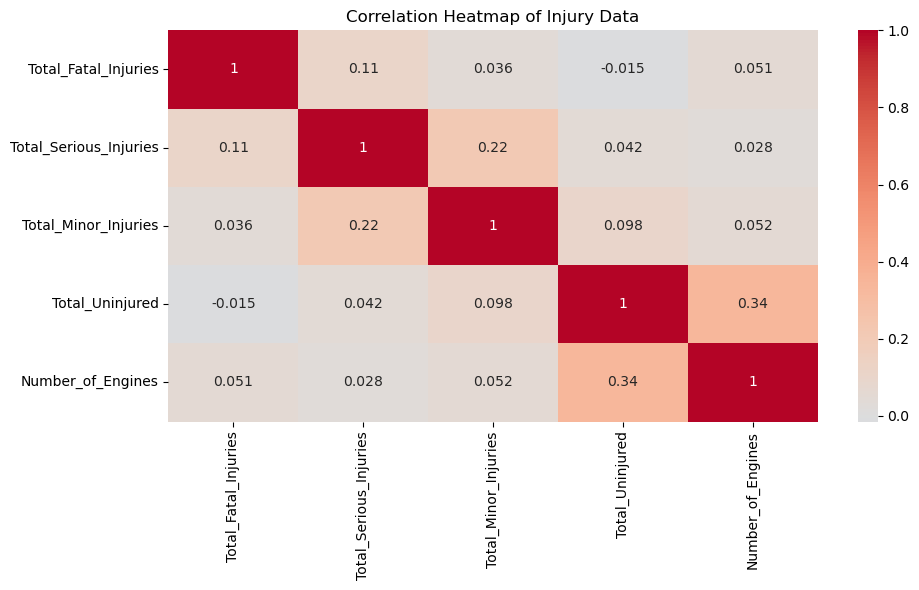

In [68]:
plt.figure(figsize=(10, 6))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Injury Data')
plt.tight_layout()
plt.show()

### Which Aircraft models are most involved in Accidents

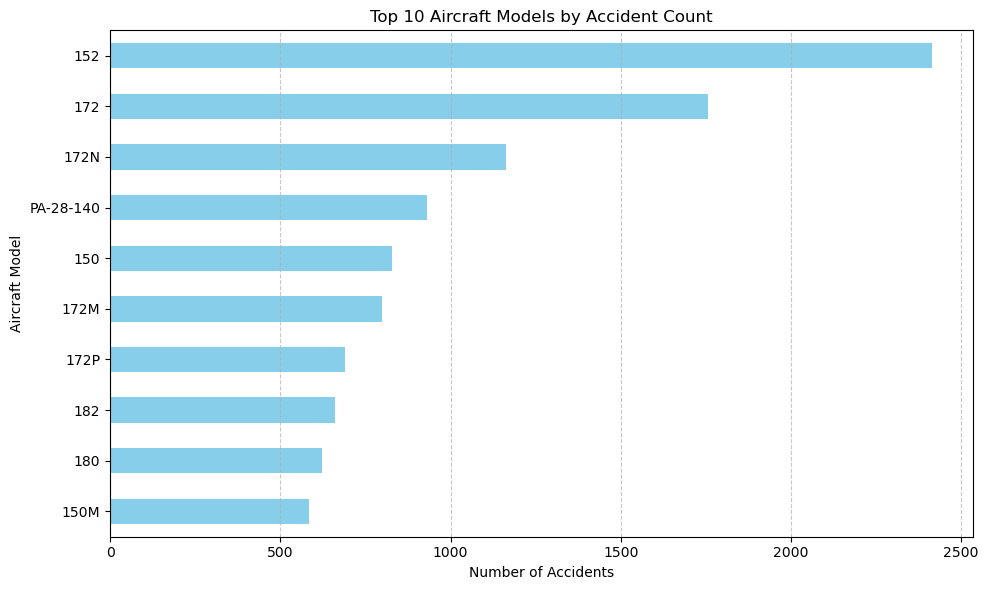

In [69]:
# Count the number of accidents per aircraft model
model_counts = df['Model'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
model_counts.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Highest count at the top
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Model")
plt.title("Top 10 Aircraft Models by Accident Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

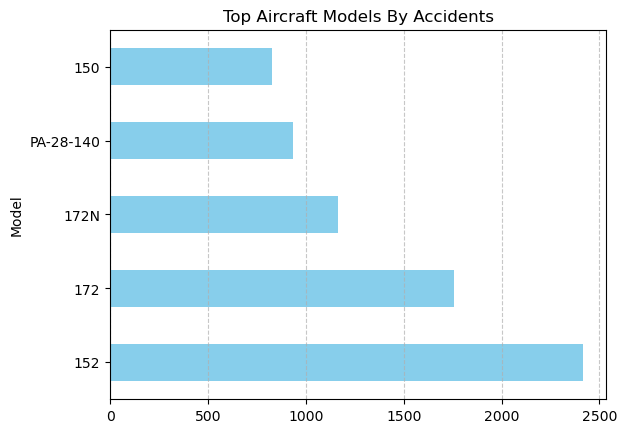

In [70]:
df['Model'].value_counts().head(5).plot(kind='barh',color='skyblue')
plt.title('Top Aircraft Models By Accidents')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### Aircraft models that are least involved in accidents

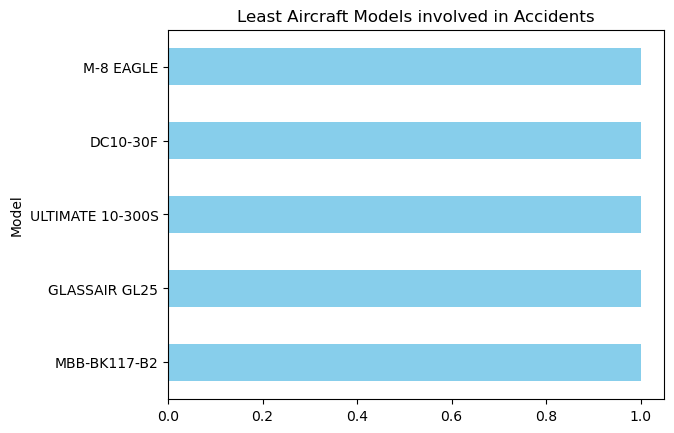

In [71]:
df['Model'].value_counts().tail().plot(kind='barh',color='skyblue')
plt.title('Least Aircraft Models involved in Accidents')
plt.show()

In [72]:
df['Purpose_of_flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [73]:
df['Aircraft_Category'].unique()

array(['Unknown', 'Airplane', 'Helicopter', 'Glider', 'Balloon',
       'Gyrocraft', 'Ultralight', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [74]:
df['Number_of_Engines'].value_counts()

Number_of_Engines
1.0    75564
2.0    11075
0.0     1223
3.0      482
4.0      426
8.0        3
6.0        1
Name: count, dtype: int64

## Does number of Aircraft engines account for AVIATION accidents ?

### Number of Engines 

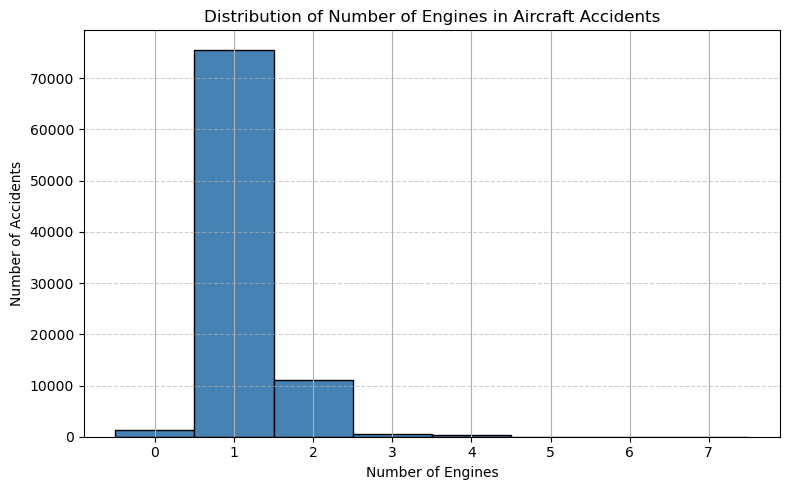

In [75]:
df['Number_of_Engines'] = df['Number_of_Engines'].astype(int)

# Plot histogram
plt.figure(figsize=(8, 5))
df['Number_of_Engines'].hist(bins=(df['Number_of_Engines'].max()), align='left', color='steelblue', edgecolor='black')
plt.title('Distribution of Number of Engines in Aircraft Accidents')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
#plt.xticks(range(1, df['Number_of_Engines'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

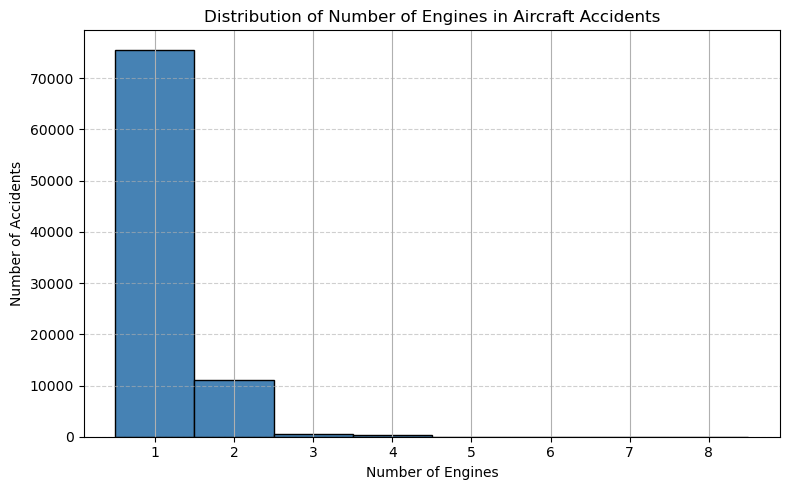

In [76]:
# Plot histogram
plt.figure(figsize=(8, 5))
df['Number_of_Engines'].hist(bins=range(1, df['Number_of_Engines'].max() + 2), align='left', color='steelblue', edgecolor='black')
plt.title('Distribution of Number of Engines in Aircraft Accidents')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, df['Number_of_Engines'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## WHAT PHASES OF FLIGHT ARE COMMON IN ACCIDENTS

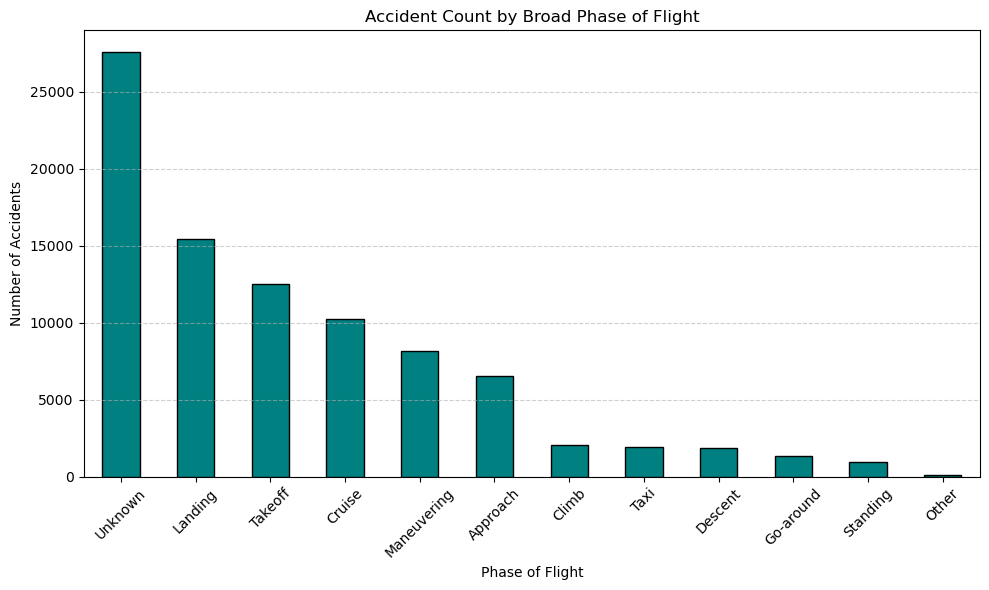

In [77]:
#df['Broad_phase_of_flight'] = df['Broad_phase_of_flight'].astype(str).str.title()

# Count occurrences of each phase
phase_counts = df['Broad_phase_of_flight'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
phase_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Accident Count by Broad Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Which Engine Type is prone to Accidents

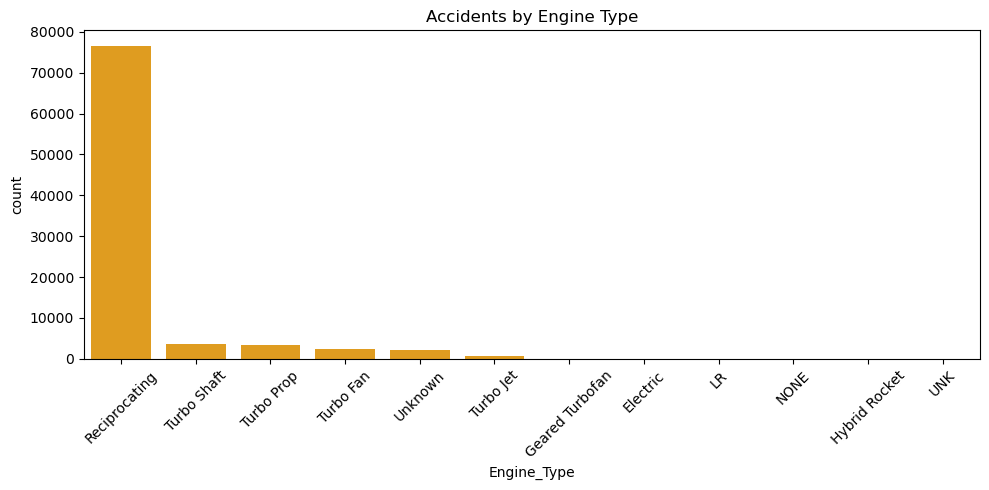

In [78]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Engine_Type',color='orange',order=df['Engine_Type'].value_counts().index)
plt.title('Accidents by Engine Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### What is the relationship between Engine types and fatalities 
##### Crucial for Aircraft purchasing decisions

In [79]:
# Total fatalities by engine type
fatalities_by_engine = df.groupby('Engine_Type')['Total_Fatal_Injuries'].sum().sort_values(ascending=False)
fatalities_by_engine


Engine_Type
Reciprocating      36670.0
Turbo Fan           4560.0
Unknown             3650.0
Turbo Prop          2568.0
Turbo Shaft         1682.0
Turbo Jet            862.0
Electric               2.0
Hybrid Rocket          1.0
Geared Turbofan        0.0
LR                     0.0
NONE                   0.0
UNK                    0.0
Name: Total_Fatal_Injuries, dtype: float64

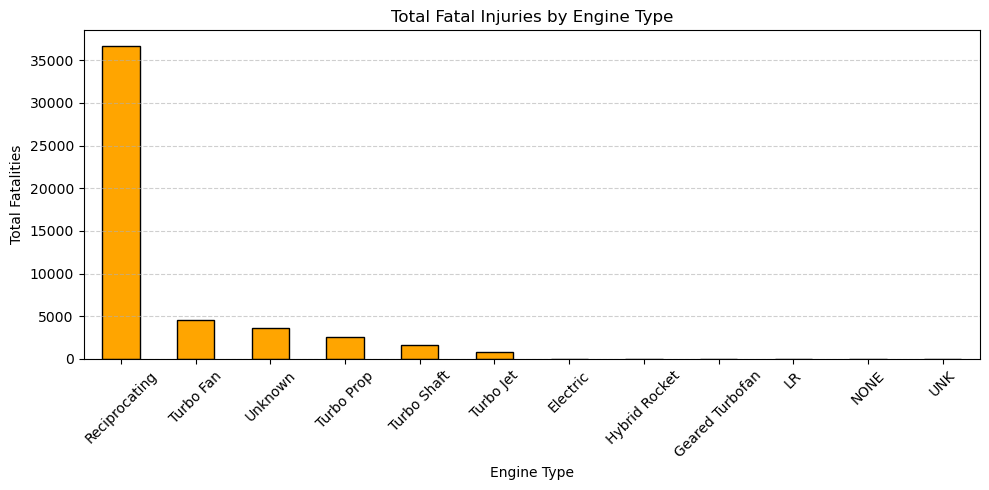

In [80]:
#Total fatalities
plt.figure(figsize=(10, 5))
fatalities_by_engine.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Fatal Injuries by Engine Type')
plt.ylabel('Total Fatalities')
plt.xlabel('Engine Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### observation : Reciprocating Engine type is prone to accidents and records the highest fatalities in aviation accident  cases.
#### UNK engine type poses insignificant accidents risks and records minimal fatalities in aviation accident cases

## Aircraft Category That reports minimal casualties

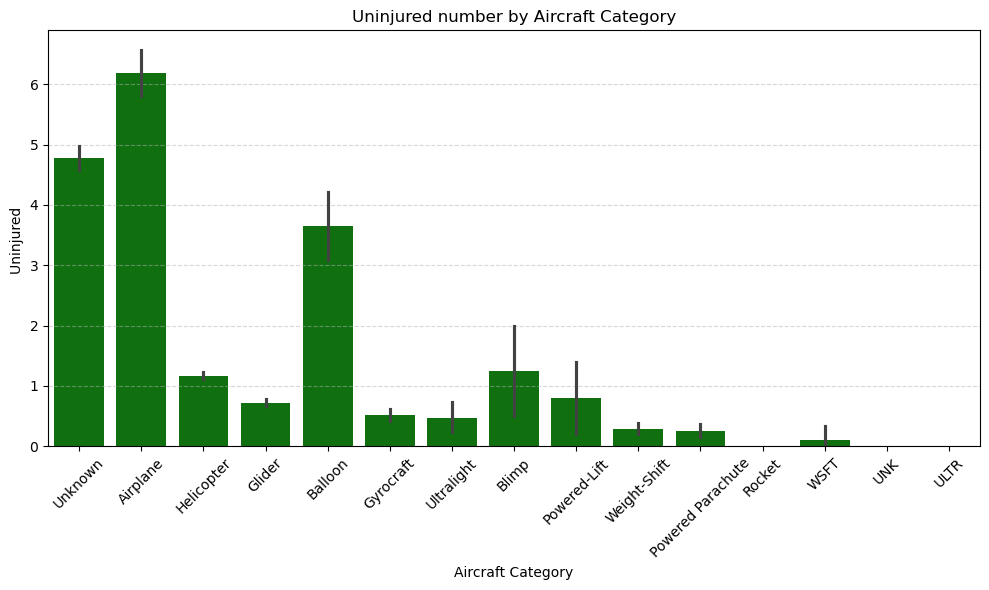

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Aircraft_Category', y='Total_Uninjured',color='green')
plt.title('Uninjured number by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Uninjured ')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Average injuries in Aircraft categories

C:\Users\Zbook\AppData\Local\Temp\ipykernel_13480\2180111137.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fatalities.values, y=avg_fatalities.index,palette='viridis')


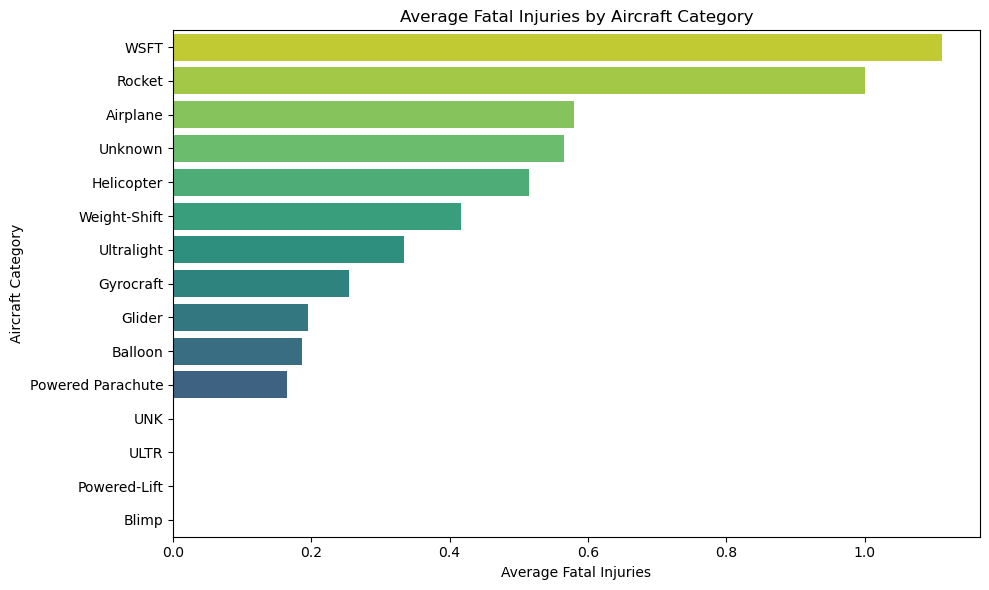

In [82]:
# Group and calculate average fatal injuries
avg_fatalities = df.groupby('Aircraft_Category')['Total_Fatal_Injuries'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fatalities.values, y=avg_fatalities.index,palette='viridis')
plt.title('Average Fatal Injuries by Aircraft Category')
plt.xlabel('Average Fatal Injuries')
plt.ylabel('Aircraft Category')
plt.gca().invert_yaxis()  # Aircraft category with highest fatality tops
plt.tight_layout()
plt.show()

### A viation Accidents trend over time

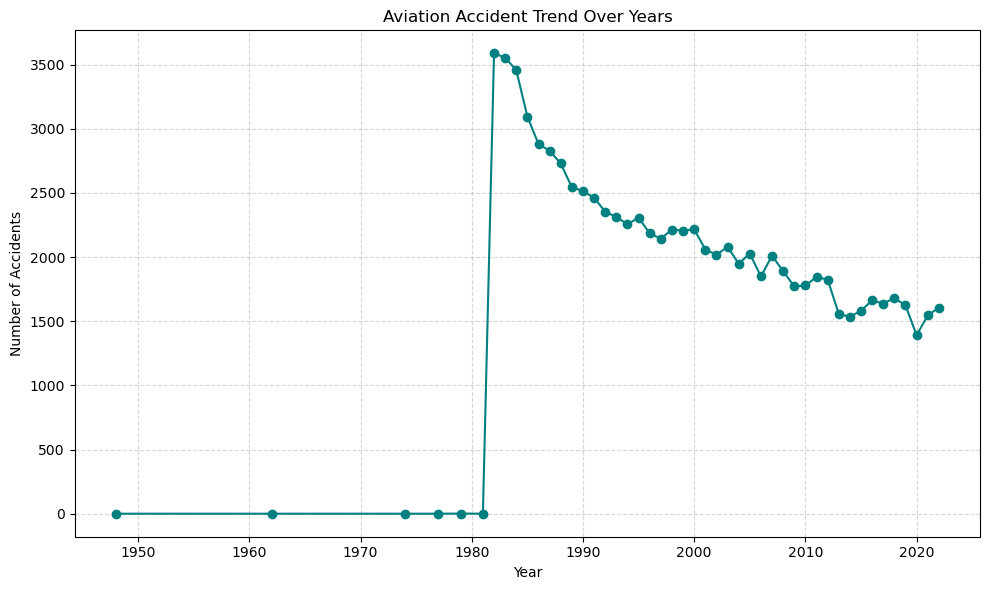

In [83]:
# Extract year
df['year'] = df['Event_Date'].dt.year

# Count accidents per year
accidents_per_year = df['year'].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', color='teal')
plt.title('Aviation Accident Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [84]:
# extracting the years that reported aviation accidents from the column event date

In [85]:
df['year'] = df['Event_Date'].dt.year
df['year']

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
88884    2022
88885    2022
88886    2022
88887    2022
88888    2022
Name: year, Length: 88774, dtype: int32

In [86]:
# Count accidents per year
accidents_per_year = df['year'].value_counts().sort_index()
accidents_per_year

year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3587
1983    3554
1984    3455
1985    3095
1986    2880
1987    2828
1988    2729
1989    2543
1990    2515
1991    2461
1992    2354
1993    2312
1994    2255
1995    2308
1996    2184
1997    2144
1998    2214
1999    2206
2000    2216
2001    2059
2002    2018
2003    2080
2004    1949
2005    2027
2006    1849
2007    2011
2008    1890
2009    1771
2010    1779
2011    1845
2012    1825
2013    1558
2014    1534
2015    1582
2016    1663
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: count, dtype: int64

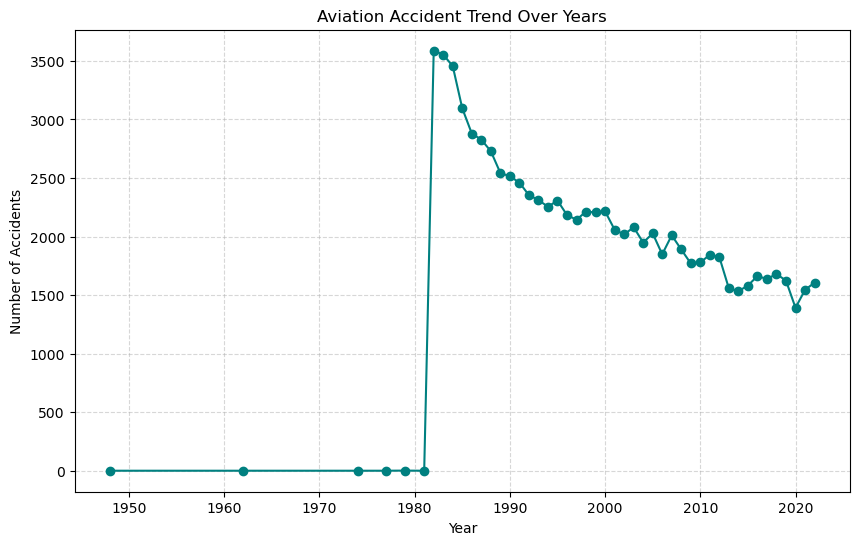

In [87]:
# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', color='teal')
plt.title('Aviation Accident Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.5)
#plt.tight_layout()
plt.show()

In [88]:
df['Purpose_of_flight'].value_counts()

Purpose_of_flight
Personal                     49429
Unknown                      12911
Instructional                10598
Aerial Application            4712
Business                      4017
Positioning                   1645
Other Work Use                1264
Ferry                          808
Aerial Observation             792
Public Aircraft                720
Executive/corporate            553
Flight Test                    404
Skydiving                      182
External Load                  123
Public Aircraft - Federal      104
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [89]:
# Filter for commercial flights only
commercial_df = df[df['Purpose_of_flight'].str.contains('Business', na=False)]

# Get accident counts per year
accidents_commercial = commercial_df['Event_Date'].dt.year.value_counts().sort_index()

# Plot
#plt.plot(accidents_commercial.index, accidents_commercial.values, label='Commercial', color='blue')

In [90]:
accidents_commercial

Event_Date
1982    296
1983    293
1984    261
1985    270
1986    198
1987    188
1988    186
1989    152
1990    157
1991    149
1992    100
1993    118
1994    123
1995    101
1996     97
1997     70
1998     60
1999    100
2000     82
2001     77
2002     71
2003     66
2004     75
2005     63
2006     56
2007     62
2008     44
2009     15
2010     40
2011     36
2012     40
2013     42
2014     33
2015     37
2016     34
2017     34
2018     39
2019     40
2020     29
2021     37
2022     46
Name: count, dtype: int64

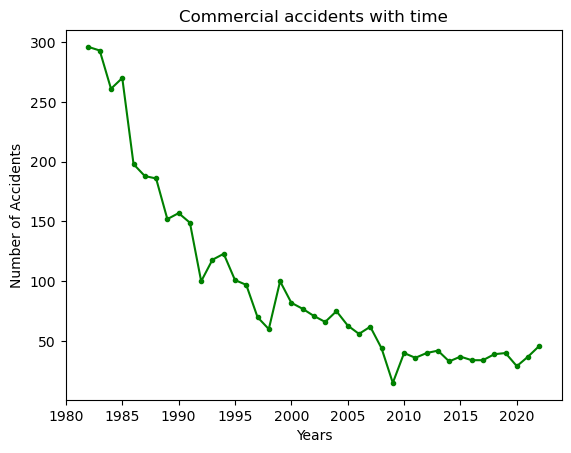

In [91]:
# Plot
plt.plot(accidents_commercial.index, accidents_commercial.values, label='Commercial', color='green',marker='.')
plt.xlabel('Years')
plt.ylabel('Number of Accidents')
plt.title('Commercial accidents with time')
plt.show()

In [92]:
# filter for personal or private flights only
personal_df = df[df['Purpose_of_flight'].str.contains('Personal', na=False)]

# Get accident counts per year
accidents_personal = personal_df['Event_Date'].dt.year.value_counts().sort_index()

# Plot
plt.plot(accidents_personal.index, accidents_personal.values, label='personal', color='blue')



In [93]:
# Get accident counts per year
accidents_personal = personal_df['Event_Date'].dt.year.value_counts().sort_index()
accidents_personal


Event_Date
1948       1
1962       1
1974       1
1977       1
1979       1
1981       1
1982    1932
1983    2003
1984    2005
1985    1771
1986    1677
1987    1624
1988    1539
1989    1399
1990    1384
1991    1389
1992    1393
1993    1310
1994    1207
1995    1310
1996    1210
1997    1148
1998    1259
1999    1235
2000    1210
2001    1117
2002    1142
2003    1195
2004    1123
2005    1136
2006    1064
2007    1142
2008    1042
2009    1069
2010    1030
2011    1030
2012    1026
2013     839
2014     852
2015     869
2016     880
2017     859
2018     866
2019     825
2020     752
2021     767
2022     793
Name: count, dtype: int64

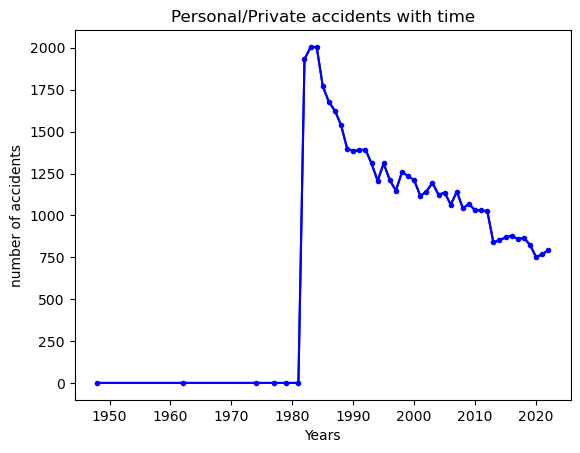

In [94]:
# personal_accidents plot
plt.plot(accidents_personal.index, accidents_personal.values, label='personal', color='blue',marker='.')
plt.xlabel('Years')
plt.ylabel('number of accidents')
plt.title('Personal/Private accidents with time')
plt.show()

##### DUAL REPRESENTATION

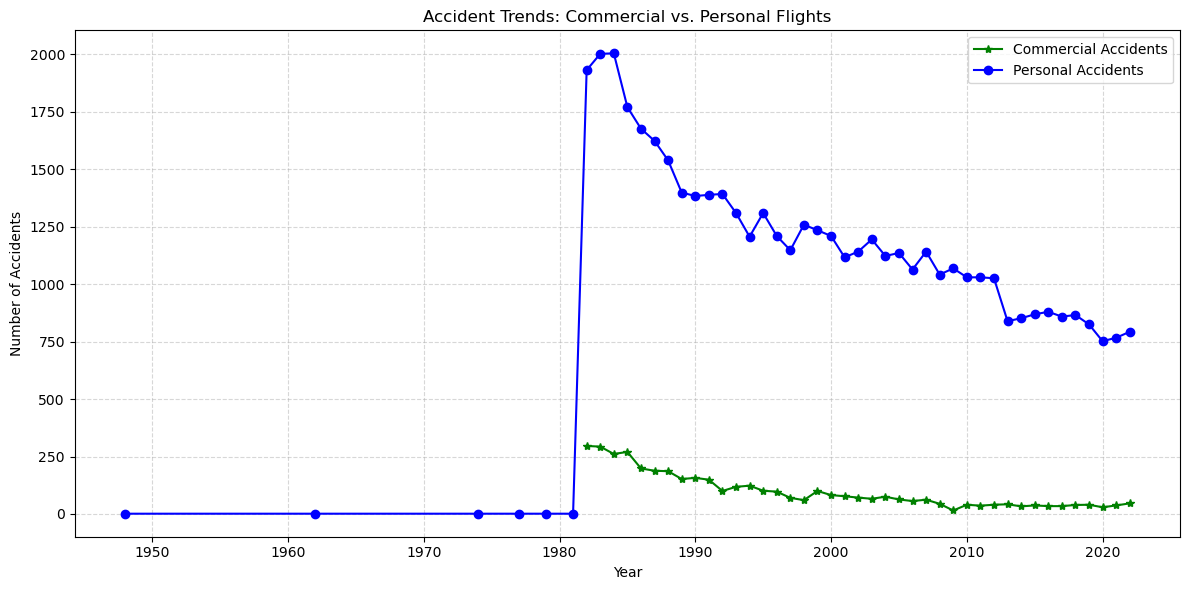

In [95]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(accidents_commercial.index, accidents_commercial.values, label='Commercial Accidents', color='green', marker='*')
plt.plot(accidents_personal.index, accidents_personal.values, label='Personal Accidents', color='blue', marker='o')
plt.title('Accident Trends: Commercial vs. Personal Flights')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Accident counts per Aircraft Category

#### Which Aircraft category has the highest number of accidents

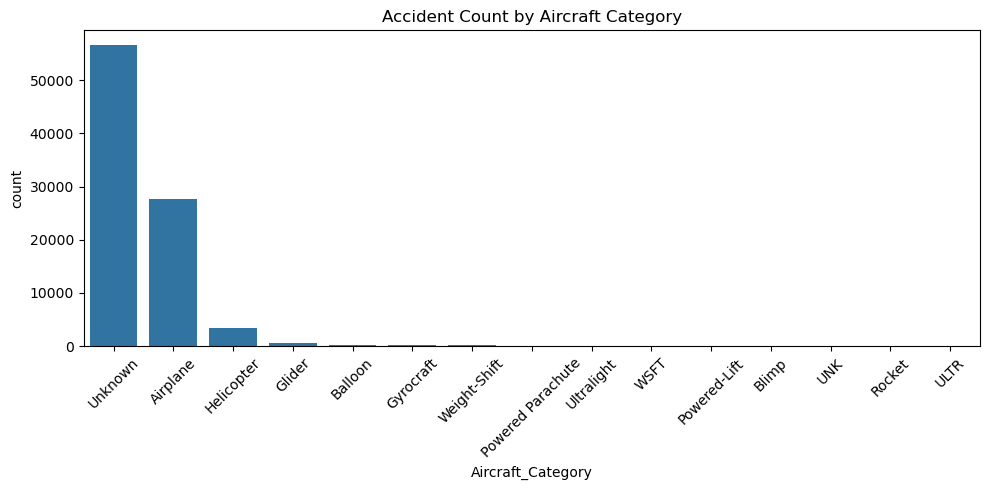

In [96]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Aircraft_Category', order=df['Aircraft_Category'].value_counts().index)
plt.title('Accident Count by Aircraft Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Airplanes record highest aviation accidents , of the known aircraft categories , followed by helicopter 

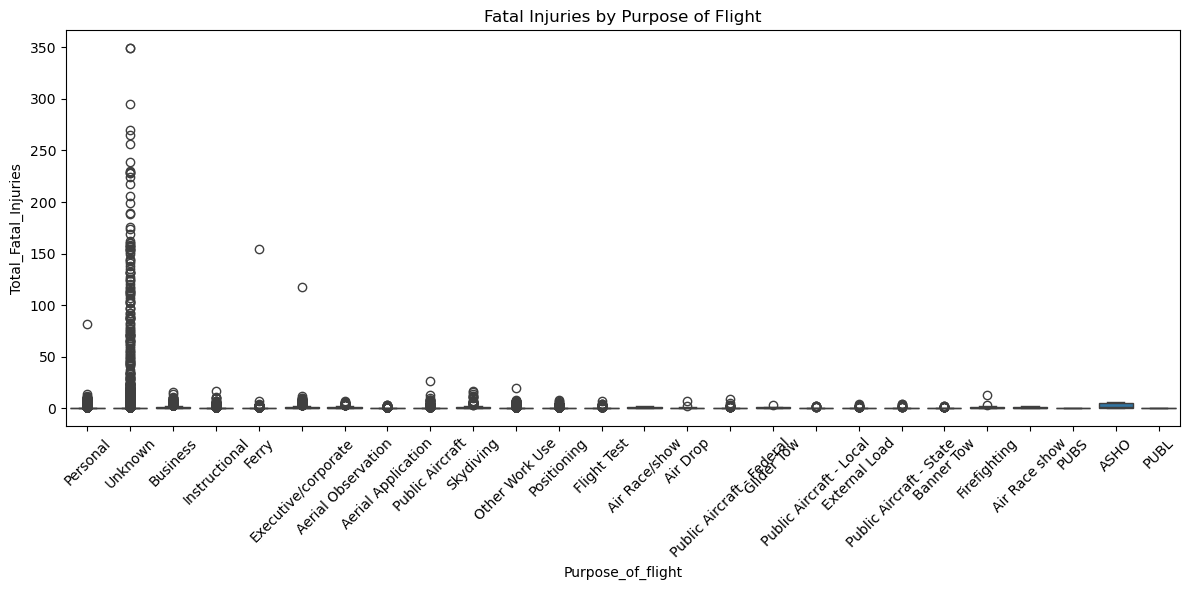

In [97]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Purpose_of_flight', y='Total_Fatal_Injuries')
plt.title('Fatal Injuries by Purpose of Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:
numeric_columns = ['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries','Total_Uninjured','Number_of_Engines']

## FATAL INJURIES BY PURPOSE OF FLIGHT
### Showing which flight purpose has the highest fatalities

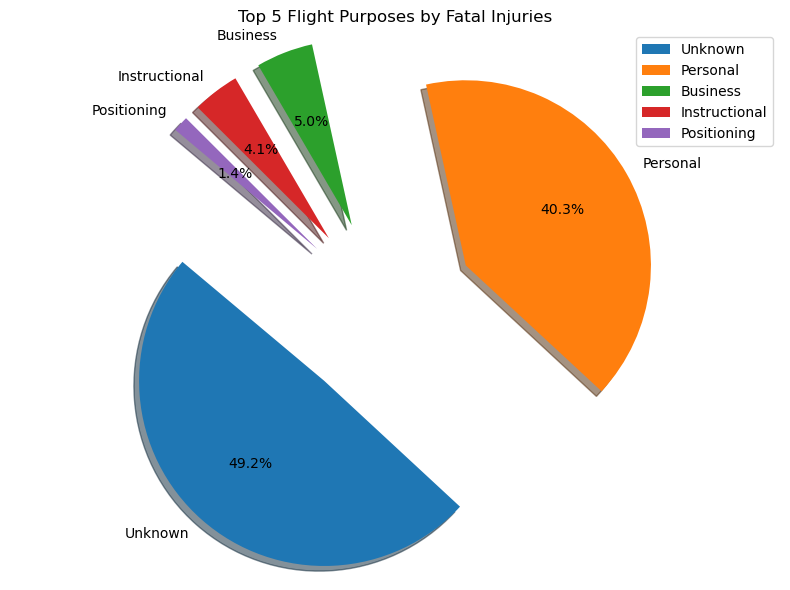

In [99]:
# Group and sum fatal injuries by purpose
fatal_by_purpose = df.groupby('Purpose_of_flight')['Total_Fatal_Injuries'].sum().sort_values(ascending=False).head(5)

# Pie chart
plt.figure(figsize=(8, 6))
explode = [0.5, 0.5, 0.5, 0.5,0.5]  # Highlight fatal injuries
plt.pie(fatal_by_purpose, labels=fatal_by_purpose.index, autopct='%1.1f%%', startangle=140 ,explode=explode,shadow=True)
mylabels=(fatal_by_purpose)
plt.title('Top 5 Flight Purposes by Fatal Injuries')
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

##### OBSERVATION : Personal aviation accounts for the highest known purpose of flight , accident causes , followed by Business

# KEY OBSERVATIONS : GENERAL

####  1. Aircraft Models that are frequently involved in accidents are:
[152,  172,  172N,  PA-28-140,  150]
##### While the least involved are [SNJ-5C  ,QUICKSILVER SPORT2  ,727-2Q8,   WMF   ,M-8-EAGLE]
#### 2. Aircrafts with Minimumal number of Engines pose high risk of Aviation accident cases.
#### Those with a single engine record high accident cases 

#### 3. Most Aviation accidents occur at the LANDING (known phase) 
#### It is attributed by high frequency due to proximity to the ground and pilot errors in some cases 

#### 4. Reciprocating Engine type records the highest number of accident cases .
#### It also records the hightest number of fatalities in accident reports
#### UNK type is less prone and records minimal aviation fatalities

#### 5. Aviation accident cases are declining with time .
#### Commercial flights experience low accident frequency, attributed by advanced technology with time

## RECOMMENDATIONS

1. ### Invest in Commercial flights , they are less prone to aviation accidents
2. ### Purchase flights with UNK engine type as it is less prone to accidents and records low number of fatalities accident cases
3. ### SNJ-5C , QUICKSILVER SPORT 2 , 727-2Q8, WMF, and  M-8-EAGLE  are the ideal Aircraft models
4. ### Flights with high engine numbers are safer compared to with less number of engines 

### Saving data as a csv file

In [101]:
pd.to_csv('Aviation_risk.csv',index=False)

AttributeError: module 'pandas' has no attribute 'to_csv'

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.to_csv("Aviation_Risk.csv",sep='\t',index=False)

In [ ]:
df.head()

In [ ]:
df.to_csv("AviationRisk.csv",sep='\t',index=False)

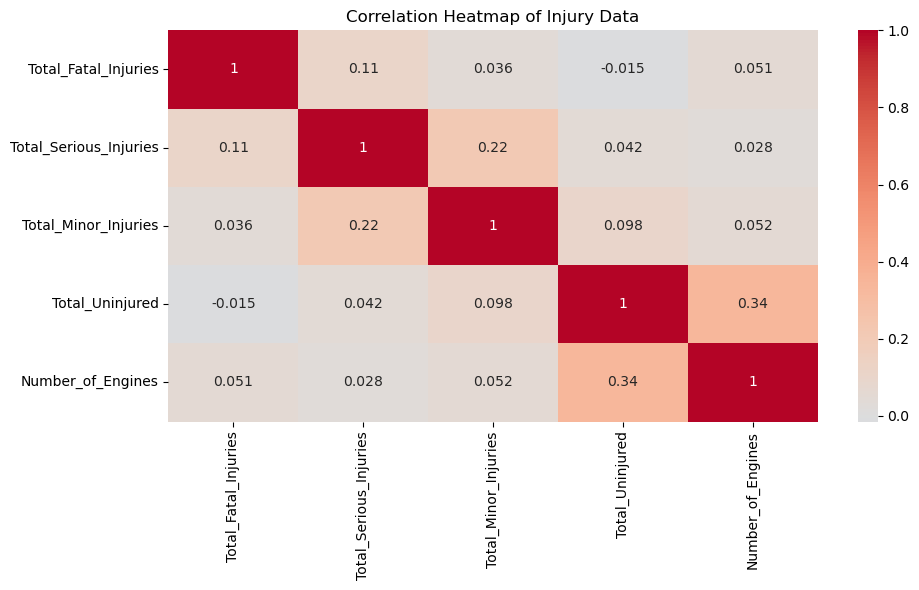

In [107]:
plt.figure(figsize=(10, 6))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Injury Data')
plt.tight_layout()
plt.savefig('correlation_heatmap')
plt.show()